<a href="https://colab.research.google.com/github/ujanichakma/AI_LAB_4-1_2025/blob/main/DigitAssignment/AI_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving my_dataset.npz to my_dataset.npz


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder

In [19]:
#LOAD
data = np.load("my_dataset.npz")
X_train, X_test = data["x_train"], data["x_test"]
y_train, y_test = data["y_train"], data["y_test"]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (2084, 28, 28, 1)
X_test shape: (522, 28, 28, 1)


In [20]:
#processing
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [21]:
# Build Model
inputs = Input((28,28))
x = Flatten()(inputs)
x1 = Dense(128, activation="relu")(x)
x2 = Dense(256,  activation="relu")(x1)
x3 = Dense(32,  activation="relu")(x2)
x4 = Dense(32,  activation="relu")(x3)
outputs = Dense(10, activation="softmax")(x4)
model = Model(inputs, outputs)

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [23]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,         # start with 50, you can increase if needed
    batch_size=64,
    verbose=1
)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2118 - loss: 2.2249 - val_accuracy: 0.2548 - val_loss: 2.0553
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2992 - loss: 1.9166 - val_accuracy: 0.3793 - val_loss: 1.7676
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4596 - loss: 1.5697 - val_accuracy: 0.4617 - val_loss: 1.5587
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5587 - loss: 1.3094 - val_accuracy: 0.4923 - val_loss: 1.4473
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6233 - loss: 1.1047 - val_accuracy: 0.5249 - val_loss: 1.4127
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6608 - loss: 1.0006 - val_accuracy: 0.5441 - val_loss: 1.3957
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6783 - loss: 0.9140 - val_accuracy: 0.5383 - val_loss: 1.4892
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7174 - loss: 0.8406 - val_accuracy: 0.5402 - val_loss

In [24]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
test_acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {test_acc:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
✅ Test Accuracy: 0.6935


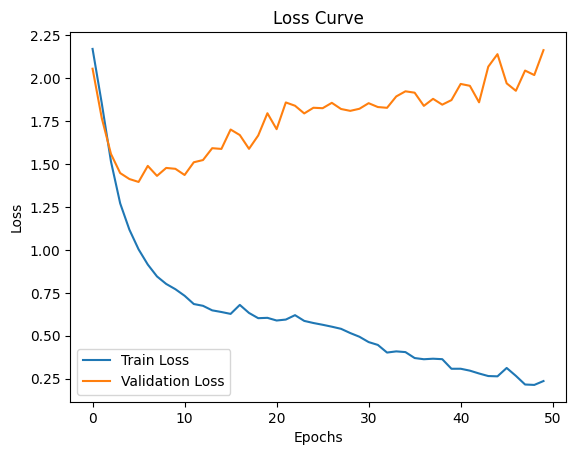

In [25]:
plt.figure()
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

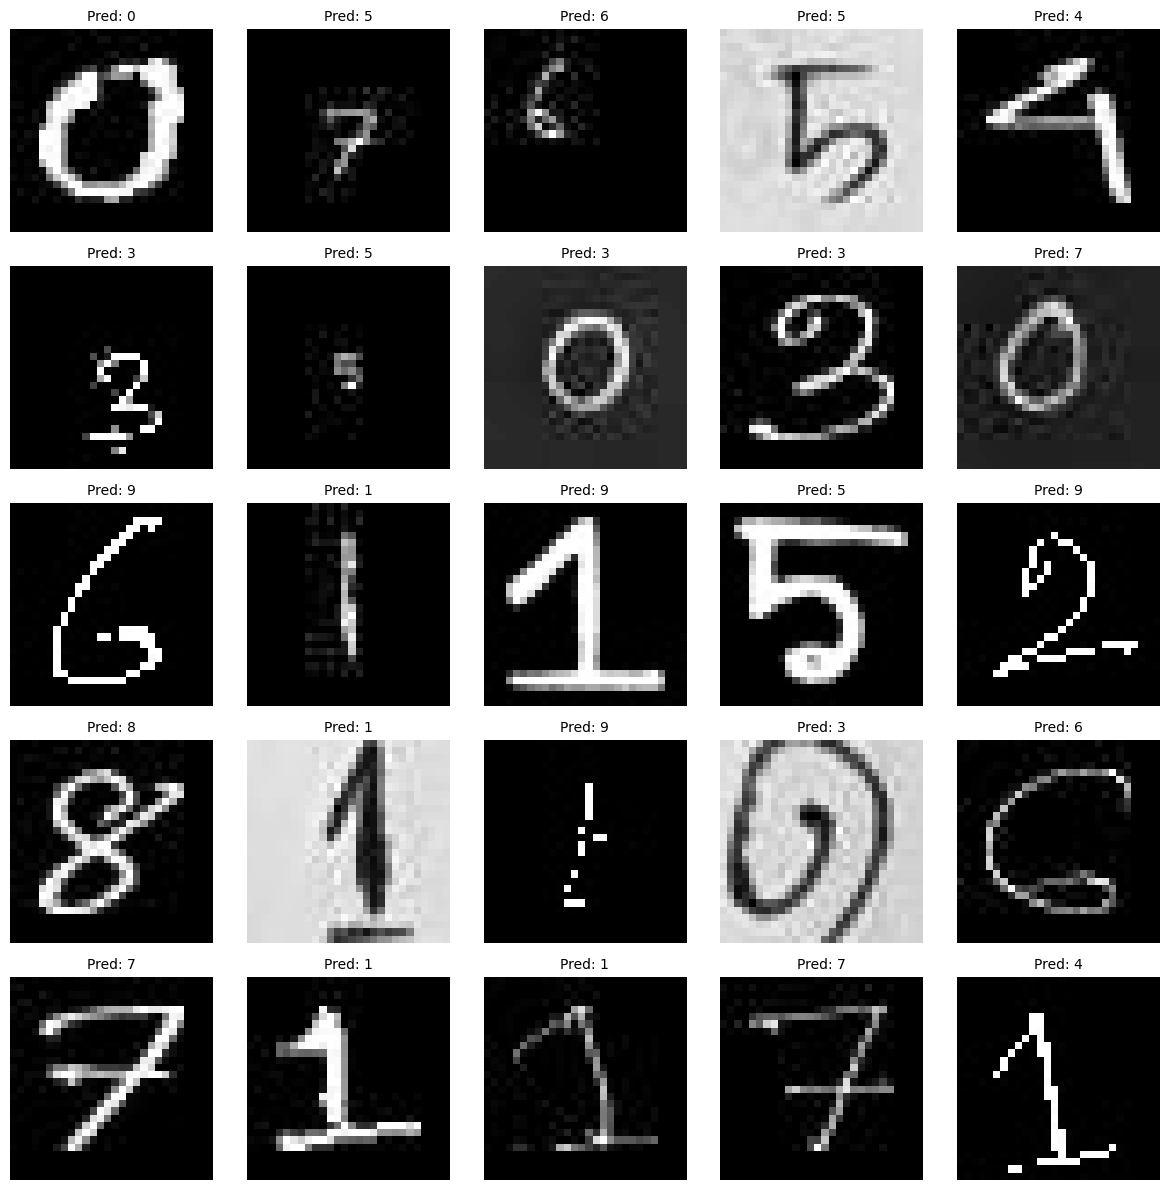

In [26]:
plt.figure(figsize=(12, 12))
n_samples = min(25, len(X_test))
for i in range(n_samples):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].squeeze(), cmap="gray")  # squeeze removes the extra channel dim
    plt.title(f"Pred: {y_pred[i]}", fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()